In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt
from scipy import optimize
from sympy.solvers import solve
from sympy import Symbol
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('expand_frame_repr', False)

In [2]:
qa = pd.read_csv('QA_metadata_tabDelimited.txt', sep = "\t")
simplified = qa[['ProcessDataID', 'CodeName', 'cathodeMass']]

In [3]:
simplified = simplified.dropna()
simplified

,ProcessDataID,CodeName,cathodeMass
0,1012915.0,QA_85_14,18.136944
1,844856.0,QA_53_1,18.439984
2,231580.0,QA_13_1,28.088160
3,231766.0,QA_14_8,28.273980
4,844841.0,QA_55_14,18.932424
...,...,...,...
1115,869192.0,QA_67_7,29.115060
1116,849394.0,QA_59_4,19.352454
1117,1011020.0,QA_87_12,18.136944
1118,1001061.0,QA_77_3,18.193764


In [4]:
def path_listing(path):
    path_files = [f for f in listdir(path) if isfile(join(path, f)) if f[:13] == "ProcessDataID"]
    for i in path_files:
        print(i)
    return path_files

In [5]:
path_list = path_listing(r'C:\Users\cjang.WILDCAT\Desktop\data_driven\CJ_work')
path_list[0]

ProcessDataID_184982_tabDelimited.txt
ProcessDataID_184985_tabDelimited.txt
ProcessDataID_184988_tabDelimited.txt
ProcessDataID_184991_tabDelimited.txt
ProcessDataID_184994_tabDelimited.txt
ProcessDataID_184997_tabDelimited.txt
ProcessDataID_185000_tabDelimited.txt
ProcessDataID_185003_tabDelimited.txt
ProcessDataID_185006_tabDelimited.txt
ProcessDataID_185009_tabDelimited.txt
ProcessDataID_185012_tabDelimited.txt
ProcessDataID_185015_tabDelimited.txt
ProcessDataID_185018_tabDelimited.txt
ProcessDataID_185021_tabDelimited.txt
ProcessDataID_185024_tabDelimited.txt
ProcessDataID_185027_tabDelimited.txt


'ProcessDataID_184982_tabDelimited.txt'

In [6]:
ids = []
for i in path_list:
    up1 = i.strip('ProcessDataID_')
    no = up1.strip('_tabDelimited.txt')
    ids.append(float(no))
    print(float(no))

184982.0
184985.0
184988.0
184991.0
184994.0
184997.0
185000.0
185003.0
185006.0
185009.0
185012.0
185015.0
185018.0
185021.0
185024.0
185027.0


In [7]:
df = pd.read_csv(path_list[0], sep = "\t")
df.head()

,ProcessDataID,OffsetTime_h,StepNumber,Cycle,Step,State,Flag1,Flag2,Flag3,Voltage_V,...,CycleCapacity_mAh,StateCapacity_mAh,StepCapacity_mAh,Energy_Wh,CycleEnergy_Wh,StateEnergy_Wh,StepEnergy_Wh,StepOffsetTime_h,dI_dt_mA_per_h,dQ_qV_mAh_per_V
0,184982,0.000028,0,0,SetTemperature,Initial,Cycle-0,1.0,SetTemp,0.138500,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000028,0,0
1,184982,0.002806,1,0,ApplyCurrent,Charge,Cycle-0,0.1,Charging,1.036164,...,0.000860,0.000860,0.000860,8.907017e-07,8.907017e-07,8.907017e-07,8.907017e-07,0.002778,0,0
2,184982,0.005583,1,0,ApplyCurrent,Charge,Cycle-0,0.1,Charging,1.874889,...,0.002078,0.002078,0.002078,3.175524e-06,3.175524e-06,3.175524e-06,3.175524e-06,0.005556,0,0
3,184982,0.008361,1,0,ApplyCurrent,Charge,Cycle-0,0.1,Charging,2.190412,...,0.003397,0.003397,0.003397,6.063274e-06,6.063274e-06,6.063274e-06,6.063274e-06,0.008333,0,0
4,184982,0.011139,1,0,ApplyCurrent,Charge,Cycle-0,0.1,Charging,2.284153,...,0.004766,0.004766,0.004766,9.190301e-06,9.190301e-06,9.190301e-06,9.190301e-06,0.011111,0,0


In [8]:
df['ProcessDataID'][0]

184982

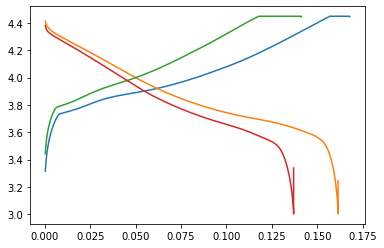

In [11]:
i = list(simplified['ProcessDataID'])

df['cathodeMass'] = np.ones(len(df)) * simplified.iloc[i.index(df['ProcessDataID'][0])].cathodeMass
df['divided'] = df['StateCapacity_mAh']/df['cathodeMass']
si = df[['ProcessDataID', 'StepNumber', 'Cycle', 'Step','State', 'Voltage_V', 'cathodeMass', 'StateCapacity_mAh', 'divided']]


tenth_dis = si[(si['Cycle'] == 10) & (si['State'] == 'Discharge')]
#tenth cycle plot
tenth_charge = si[(si['Cycle'] == 10) & (si['State'] == 'Charge')]

plt.plot(tenth_charge['divided'], tenth_charge['Voltage_V'])
plt.plot(tenth_dis['divided'], tenth_dis['Voltage_V'])

si = df[['ProcessDataID', 'StepNumber', 'Cycle', 'Step','State', 'Voltage_V', 'cathodeMass', 'StateCapacity_mAh', 'divided']]
hundth_dis = si[(si['Cycle'] == 100) & (si['State'] == 'Discharge')]
#tenth cycle plot
hundth_charge = si[(si['Cycle'] == 100) & (si['State'] == 'Charge')]

plt.plot(hundth_charge['divided'], hundth_charge['Voltage_V'])
plt.plot(hundth_dis['divided'], hundth_dis['Voltage_V'])

In [12]:
(min(set(tenth_dis['Voltage_V'])), max(set(tenth_dis['Voltage_V']))), (min(set(hundth_dis['Voltage_V'])), max(set(hundth_dis['Voltage_V'])))

((3.0018439999999997, 4.413483), (3.001173, 4.3825330000000005))

-0.00623189567828348
-0.00372788370568896
-0.00175667257245822
-7.19527325098369e-5
0.00142178313118827
0.00277741370130098
0.00402950535826744
0.00520447529094501
0.00631681067917535
0.00738106486139284
0.00840705806829497
0.00939981266989222
0.0103646370582517
0.0113084589176039
0.0122328397382425
0.0131403209217419
0.0140270680666656
0.0149001800889162
0.0157581064416052
0.0165960905808132
0.0173937345220064
0.0181464740452106
0.0188152551788064
0.0193871720574954
0.0198446989158604
0.0202026578633873
0.0204854569203928
0.0207166560745490
0.0209090591712539
0.0210815749677201
0.0212359291925280
0.0213897299529065
0.0215386516979900
0.0216863278025044
0.0218373934328277
0.0219934276169205
0.0221499489878401
0.0223104969572848
0.0224742226837728
0.0226421253557094
0.0228130338588942
0.0229890696431048
0.0231682685916859
0.0233529532129192
0.0235380506537673
0.0237253618708878
0.0239129483065469
0.0241063049523621
0.0243027119986576
0.0245030859076322
0.0247028960874860
0.0249079880132

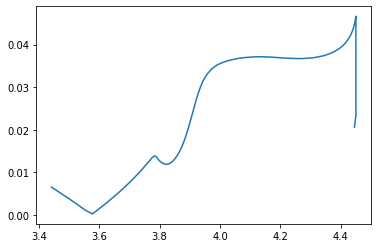

In [35]:
y_data = tenth_charge['Voltage_V']
x_data = tenth_charge['divided']
def test_func(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x**1 + e
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,p0=[0, 0, 0, 0, 0])
sols = []
for i in hundth_charge['Voltage_V']:
    x = Symbol('x', real=True)
    solutions = solve(params[0]*x**4 + params[1]*x**3 + params[2]*x**2 + params[3]*x**1 + params[4] - i, x)
    #print(solutions[0])
    sols.append(solutions[0])
hundth_charge_preds = {'voltage': hundth_charge['Voltage_V'], 'hund mass': hundth_charge['divided'], 'tenth mass': sols}
df1 = pd.DataFrame(data = hundth_charge_preds)
df1['difference'] = abs(df1['hund mass'] - df1['tenth mass'])
plt.plot(df1['voltage'], df1['difference'])

In [14]:
print(params)

[-7.02713543e+03  2.55779027e+03 -2.96062134e+02  1.62074328e+01
  3.55529570e+00]


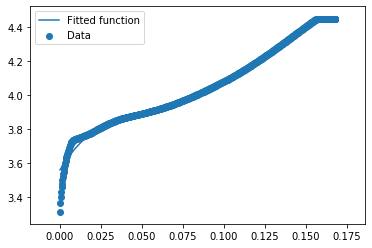

In [15]:
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1], params[2], params[3], params[4]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

In [17]:
hundth_charge['Voltage_V'],hundth_charge['divided'] 

(183260    3.442165
 183261    3.490628
 183262    3.525897
 183263    3.554128
 183264    3.577748
             ...   
 184122    4.446305
 184123    4.445874
 184124    4.445549
 184125    4.445307
 184126    4.445098
 Name: Voltage_V, Length: 867, dtype: float64,
 183260    0.000245
 183261    0.000492
 183262    0.000739
 183263    0.000986
 183264    0.001233
             ...   
 184122    0.141158
 184123    0.141158
 184124    0.141158
 184125    0.141158
 184126    0.141158
 Name: divided, Length: 867, dtype: float64)

-0.00623189567828348
-0.00372788370568896
-0.00175667257245822
-7.19527325098369e-5
0.00142178313118827
0.00277741370130098
0.00402950535826744
0.00520447529094501
0.00631681067917535
0.00738106486139284
0.00840705806829497
0.00939981266989222
0.0103646370582517
0.0113084589176039
0.0122328397382425
0.0131403209217419
0.0140270680666656
0.0149001800889162
0.0157581064416052
0.0165960905808132
0.0173937345220064
0.0181464740452106
0.0188152551788064
0.0193871720574954
0.0198446989158604
0.0202026578633873
0.0204854569203928
0.0207166560745490
0.0209090591712539
0.0210815749677201
0.0212359291925280
0.0213897299529065
0.0215386516979900
0.0216863278025044
0.0218373934328277
0.0219934276169205
0.0221499489878401
0.0223104969572848
0.0224742226837728
0.0226421253557094
0.0228130338588942
0.0229890696431048
0.0231682685916859
0.0233529532129192
0.0235380506537673
0.0237253618708878
0.0239129483065469
0.0241063049523621
0.0243027119986576
0.0245030859076322
0.0247028960874860
0.0249079880132

In [28]:
len(sols)

867

In [31]:

df1

,voltage,hund mass,tenth mass
183260,3.442165,0.000245,-0.00623189567828348
183261,3.490628,0.000492,-0.00372788370568896
183262,3.525897,0.000739,-0.00175667257245822
183263,3.554128,0.000986,-7.19527325098369e-5
183264,3.577748,0.001233,0.00142178313118827
...,...,...,...
184122,4.446305,0.141158,0.162315425955675
184123,4.445874,0.141158,0.162109300440857
184124,4.445549,0.141158,0.161958013700087
184125,4.445307,0.141158,0.161847508842688


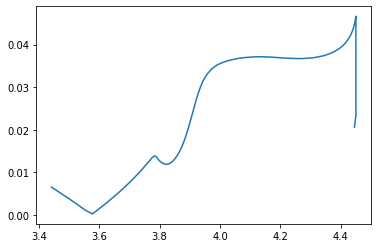